# ソロー・モデル

## 始める前に

次のセルの１行目以外をアンコメント（`# `を削除）しなさい。アンコメントするには次の手順に従う。
* Windowsの場合：１行目以外の全ての行を選択し，`Ctrl`を押したまま`/`を押す。
* Macの場合：１行目以外の全ての行を選択し，`command`を押したまま`/`を押す。

In [1]:
# CELL PROVIDED
# import piplite
# await piplite.install(['py4macro','japanize-matplotlib-jlite'])
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (4, 3)

次のコードを実行しなさい。

In [2]:
# CELL PROVIDED
import japanize_matplotlib_jlite
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import py4macro

np.set_printoptions(legacy='1.21')

## はじめに

差分方程式の応用となるソロー・モデルを考える。モデルの説明の後，`Python`を使い動学的な特徴を明らかにする。また理論的な予測がデータと整合性があるかについてもPenn World Tableを使って検討する。

## ソロー・モデルの復習

簡単にモデルを紹介し，重要な式をまとめることにする。

＜記号＞
* 産出量：$Y_t$
* 消費量：$C_t$
* 投資量：$I_t$
* 資本ストック：$K_t$
* 労働：$L_t$
* 貯蓄率（一定な外生変数）：$0<s<1$
* 労働人口増加率（一定な外生変数）：$n\equiv\dfrac{L_{t+1}}{L_t}-1\geq 0$
* 資本減耗率（一定な外生変数）：$0<d<1$
* 生産性（一定な外生変数）：$A>0$

＜一人当たりの変数＞
* 一人当たり産出量：$y_t\equiv\dfrac{Y_t}{L_t}$
* 一人当たり消費量：$c_t\equiv\dfrac{C_t}{L_t}$
* 一人当たり投資量：$i_t\equiv\dfrac{I_t}{L_t}$
* 一人当たり資本ストック：$k_t\equiv\dfrac{K_t}{L_t}$

全ての市場は完全競争である閉鎖経済を考えよう。この経済には一種類の財（ニューメレール財）しかなく，消費・貯蓄・投資に使われる。財は次の生産関数に従って生産される。

$$
Y_t=AK_t^aL_t^{1-a},\quad 0<a<1
$$

両辺を$L_t$で割ると一人当たりの変数で表した生産関数となる。

$$
y_t=Ak_t^a
$$

消費者は所得の割合$s$を貯蓄するが，このモデルの中で消費者の役割はこれだけであり，残り全ては生産側で決定される。貯蓄は$sY_t$であり投資$I_t$と等しくなる。

$$
sY_t=I_t
$$

$t$期の投資により$t+1$期の資本ストックは増加するが，毎期，資本は$d$の率で減耗する。即ち，投資と資本ストックには次の関係が成立する。

$$
K_{t+1}-K_{t}=I_t-dK_t
$$

ここで左辺は資本ストックの変化。右辺は**純投資**であり，$I_t$は**粗投資**，$dK_t$は減耗した資本である。上述の式を使うと資本の蓄積方程式が導出できる。

$$
K_{t+1} = sAK_t^aL^{1-a} + (1-d)K_t
$$

両辺を$L_t$で割ることで一人当たりの変数で表すことができる。右辺は単純に一人当たりの変数に直し，左辺は次のように書き換えることに注意しよう。

$$
\frac{K_{t+1}}{L_t}=\frac{K_{t+1}}{L_{t+1}}\frac{L_{t+1}}{L_t}
=k_{t+1}(1+n)
$$

従って，$t+1$期の一人当たりの資本ストックを決定する式は次式で与えられる。

$$
k_{t+1} = \frac{sAk_t^a + (1-d)k_t}{1+n}
$$

この式は非線形の差分方程式だが，前章でも述べたように，考え方は線形差分方程式と同じであり，数値計算のための`Python`コードに関しては大きな違いはない。また式[](eq:8-kdot)を資本ストックの成長率を示す式に書き換えることもできる。

$$
\frac{k_{t+1}}{k_t}-1 = \frac{sAk_t^{-(1-a)}-(n+d)}{1+n}
$$

この式から資本が蓄積され$k_t$が増加すると，その成長率は減少していくことが分かる。

産出量の動学は生産関数[](eq:8-production)を使うことによって$y_t$の動きを確認できる。例えば，産出量の成長率を考えてみよう。生産関数を使うと

$$
\frac{y_{t+1}}{y_t}-1
=\left(\frac{k_{t+1}}{k_t}\right)^{\alpha}-1
$$

となり，一人当たり資本ストックの成長率と同じような動きをすることが分かると思う。

次に定常状態を考えよう。定常状態では資本ストックは一定なり，資本の成長率を示す式の右辺はゼロになる。
定常値は次のように確認することができる。

\begin{equation}
\begin{aligned}
\frac{k_{*}}{k_{*}}-1 &=\frac{sAk_{*}^{-(1-a)} - (n+d)}{1+n} \\
&\Downarrow \\
k_{*} &=\left(
        \frac{As}{n+d}
    \right)^{\frac{1}{1-a}}
\end{aligned}
\end{equation}

この値を生産関数に代入することにより一人当たりGDPの定常値を求めることができる。

$$
y_*=Ak_*^{a}
$$

## 動学

差分方程式[](eq:8-kdot)を使って資本ストックの変化をプロットするが，以前と同じように`DataFrame`を生成する関数を定義しよう。

"""
引数
    k0: 資本の初期値
    A: 生産性
    a: 資本の所得比率 (a<1)
    s: 貯蓄率 (s<1)
    n: 労働人口成長率（％）
    d: 資本減耗率 (d<1)
    T: ループによる計算回数
戻り値
    資本と産出量からなるDataFrame
"""

In [3]:
def solow_model(k0, A=10, a=0.3, s=0.3, n=0.02, d=0.05, T=100):
    """引数
            k0: 資本の初期値
            A: 生産性
            a: 資本の所得比率 (a<1)
            s: 貯蓄率 (s<1)
            n: 労働人口成長率（％）
            d: 資本減耗率 (d<1)
            T: ループによる計算回数
       戻り値
            資本と産出量からなるDataFrame"""
    
    k = k0           # アップデート用の変数
    y = A * k0**a    # アップデート用の変数
    
    k_lst = [k]
    y_lst = [y]

    for t in range(T):
        
        k = ( s * A * k**a + (1-d) * k )/( 1+n )
        y = A * k**a

        k_lst.append(k)
        y_lst.append(y)

    # DataFrameの作成
    dic = {'capital':k_lst, 'output':y_lst}
    df = pd.DataFrame(dic)
    
    return df 

引数に使うパラーメータには次の値を使ってプロットしてみよう。

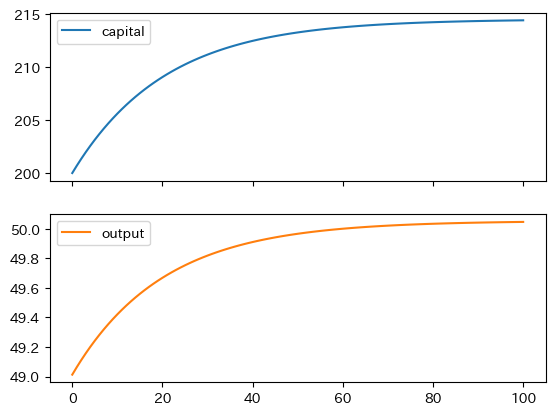

In [4]:
df = solow_model(k0=200)
df.plot(subplots=True)
pass

異なる初期値を使って資本の変化をプロットしてみる。

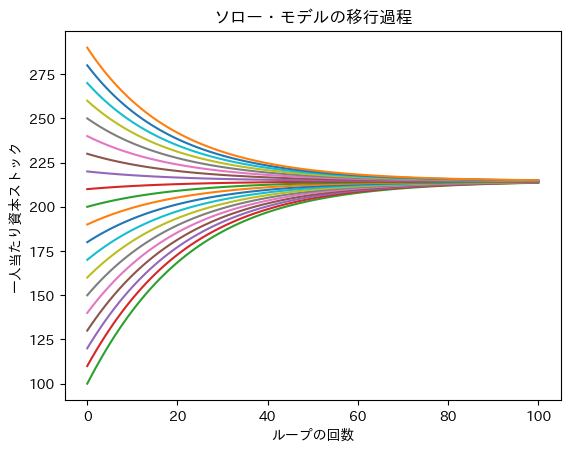

In [5]:
initial_list = range(100,300,10)      # 1

ax = pd.DataFrame({'capital':[],
                   'output':[]}).plot(legend=False)  # 2

for i in initial_list:                # 3
    
    solow_model(k0=i).plot(y='capital', legend=False, ax=ax)
    
ax.set(title='ソロー・モデルの移行過程',  # 4
       xlabel='ループの回数',
       ylabel='一人当たり資本ストック')
pass

図から初期値に関わらず定常値に収束していることが分かる。即ち，定常状態である長期均衡は安定的である。

## 定常状態での変数の値

次に定常状態での変数の値を計算してみよう。

In [6]:
def calculate_steady_state(A=10, a=0.3, s=0.3, n=0.02, d=0.05):
    
    k_ss = ( s * A / (n+d) )**( 1/(1-a) )    
    y_ss = A * k_ss**( a/(1-a) )    
    
    return k_ss, y_ss

In [7]:
ss = calculate_steady_state()

print(f'定常状態での資本ストック:{ss[0]:.1f}'
      f'\n定常状態での産出量: {ss[1]:.1f}')

定常状態での資本ストック:214.5
定常状態での産出量: 99.8


## 長期均衡の予測

### 説明

この節では長期均衡（定常状態）に焦点を当て，理論的な予測のデータとの整合性をチェックする。まず定常状態の特徴をまとめよう。式[](eq:8-kss)と[](eq:8-yss)を使いうと定常状態での一人当たり資本ストックとGDPは次式で与えれる。

$$
k_*=
\left(
     \frac{sA}{n+d}
\right)^{\frac{1}{1-a}},
\quad
y_*=Ak_*^a
$$

この２つをそれぞれ試すこともできるが，同時に捉えるために２つの式の比率を考える。

$$
\frac{k_*}{y_*}=\frac{s}{n+d}
=\left.\frac{K_t/L_t}{Y_t/L_t}\right|_{\text{定常状態}}
=\left.\frac{K_t}{Y_t}\right|_{\text{定常状態}}
$$

この値は資本ストック対GDP比と等しいく，次のことが分かる。
* 貯蓄率$s$の上昇は資本ストック対GDP比を増加させる。。
* 労働人口成長率$n$の上昇は資本ストック対GDP比を減少させる。
* 資本減耗率$d$の上昇は資本ストック対GDP比を減少させる。

この３つの予測が成立するか確かめるために`py4macro`モジュールに含まれるPenn World Dataの次の変数を使う。
* `cgdpo`：GDP（2019年;生産側）
* `cn`：物的資本ストック（2019年）
* `csh_i`：対GDP比資本形成の比率
    * 投資の対GDP比である。
    * 貯蓄率$s$の代わりに使う。
    * 1960年〜2019年の平均を使う。
* `emp`：雇用者数
    * 労働人口の代わりに使う。
    * 1960年〜2019年の平均成長率$n$の計算に使う。
* `delta`：資本ストックの年平均減耗率
    * 1960年〜2019年の平均を使う。

### データ

1960年以降のデータを`pwt`に割り当てる。

In [8]:
pwt = py4macro.data('pwt')

cols = ['country', 'year','cgdpo', 'cn', 'csh_i', 'delta', 'emp']
cond = ( pwt['year']>=1960 )
pwt = pwt.loc[cond,cols]
pwt.head()

,country,year,cgdpo,cn,csh_i,delta,emp
10,Aruba,1960,NaN,NaN,NaN,NaN,NaN
11,Aruba,1961,NaN,NaN,NaN,NaN,NaN
12,Aruba,1962,NaN,NaN,NaN,NaN,NaN
13,Aruba,1963,NaN,NaN,NaN,NaN,NaN
14,Aruba,1964,NaN,NaN,NaN,NaN,NaN


### 平均貯蓄率

In [9]:
# 空のリスト
csh_i_lst = []

for c in pwt['country'].unique():

    # 国のDataFrameを抽出
    cond = ( pwt['country']==c )
    df = pwt.loc[cond,:]
    
    # csh_iの平均を計算
    csh_i_avr = df['csh_i'].mean()
    csh_i_lst.append( csh_i_avr )

csh_i_lst[:5]

[0.3713517770171165,
 0.35646157920360566,
 0.5580004757642746,
 0.18425425548106433,
 0.3520804738998413]

### 平均資本減耗率

In [10]:
# 空のリスト
delta_lst = []

for c in pwt['country'].unique():
    
    # 国のDataFrameを抽出
    cond = ( pwt['country']==c )
    df = pwt.loc[cond,:]
        
    # deltaの平均を計算
    delta_avr = df['delta'].mean()
    delta_lst.append( delta_avr )
    
delta_lst[:5]

[0.035514478310942614,
 0.03860047377645966,
 0.02942176740616556,
 0.02952256374061103,
 0.03170581273734565]

### 労働人口増加率の平均

労働人口を`x`としよう。`n`期間における平均成長率を$g_x$と置くと次式が成立する。

$$
(1+g_x)^n=\frac{x_{t+n}}{x_{t}}
$$

両辺に対数を取り，近似を使うと次のように書き直すことができる。

\begin{align}
n\log(1+g_x)&=\log(x_{t+n})-\log(x_{t})\\
&\Downarrow\\
g_x&\approx\frac{\log(x_{t+n})-\log(x_{t})}{n}
\end{align}

右辺は`n`期間の平均成長率となる。

In [11]:
# 以前のコード ================================

# 空のリスト
# emp_growth_lst = []

# for c in pwt['country'].unique():

#     # 国のDataFrameを抽出
#     cond = ( pwt['country']==c )
#     df = pwt.loc[cond,:]
        
#     # empの増加率の平均を計算
#     t = 2019 - 1960
#     emp = df['emp']
#     emp1960 = emp.iloc[0]
#     emp2019 = emp.iloc[-1]
#     emp_growth = ( np.log(emp2019) - np.log(emp1960) ) / t
#     emp_growth_lst.append( emp_growth )
    
# emp_growth_lst[:5]

In [12]:
# 修正後のコード =================================

# 空のリスト
emp_growth_lst = []

for c in pwt['country'].unique()[:10]:

    # empの増加率の平均を計算
    t = 2019 - 1960
    
    # 国のDataFrameを抽出
    cond = ( pwt['country']==c )
    df = pwt.loc[cond,:]
    emp = df['emp']

    # empに一つでも欠損値がある場合は採用しない
    if not emp.isna().any():

        emp1960 = emp.iloc[0]
        emp2019 = emp.iloc[-1]
        emp_growth = ( np.log(emp2019) - np.log(emp1960) ) / t
        emp_growth_lst.append( emp_growth )

    else:
        emp_growth_lst.append( np.nan )
    
emp_growth_lst

[nan,
 nan,
 nan,
 nan,
 nan,
 0.016840636450126265,
 nan,
 nan,
 0.01915185280621449,
 0.004738865133217806]

### 資本対GDP比

In [13]:
# 空のリスト
ky_ratio_lst = []

for c in pwt['country'].unique():
    
    # 国のDataFrameを抽出
    cond = ( pwt['country']==c )
    df = pwt.loc[cond,:]
    
    # 資本/GDP比率を計算
    condyr = ( df['year']==2019 )
    cond = ( cond & condyr )
    cn = pwt.loc[cond,'cn'].iloc[0]
    cgdpo = pwt.loc[cond,'cgdpo'].iloc[0]
    ky_ratio = np.log( cn / cgdpo )
    ky_ratio_lst.append( ky_ratio )

ky_ratio_lst[:5]

[1.6150052094587448,
 1.7610599187235758,
 2.2397403041547603,
 1.8200221032008315,
 1.947351843034022]

### 同時に実行

In [14]:
# 空のリスト
country_lst = []
ky_ratio_lst = []
csh_i_lst = []
delta_lst = []
emp_growth_lst = []

for c in pwt['country'].unique():

    # 国名を追加
    country_lst.append( c )
    
    # 国のDataFrameを抽出
    cond = ( pwt['country']==c )
    df = pwt.loc[cond,:]
    
    # csh_iの平均を計算
    csh_i_avr = df['csh_i'].mean()
    csh_i_lst.append( csh_i_avr )
    
    # deltaの平均を計算
    delta_avr = df['delta'].mean()
    delta_lst.append( delta_avr )
    
    # empの増加率の平均を計算
    t = 2019 - 1960
    cond = ( pwt['country']==c )
    df = pwt.loc[cond,:]
    emp = df['emp']
    if not emp.isna().any():
        emp1960 = emp.iloc[0]
        emp2019 = emp.iloc[-1]
        emp_growth = ( np.log(emp2019) - np.log(emp1960) ) / t
        emp_growth_lst.append( emp_growth )
    else:
        emp_growth_lst.append( np.nan )
    
    # 資本/GDP比率を計算
    condyr = ( df['year']==2019 )
    cond = ( cond & condyr )
    cn = pwt.loc[cond,'cn'].iloc[0]
    cgdpo = pwt.loc[cond,'cgdpo'].iloc[0]
    ky_ratio = np.log( cn / cgdpo )
    ky_ratio_lst.append( ky_ratio )

辞書を作成して`DataFrame`を作成。

In [15]:
# 辞書の作成
dic = {'country':country_lst,
       'ky_ratio':ky_ratio_lst,
       'csh_i':csh_i_lst,
       'delta':delta_lst,
       'emp_growth':emp_growth_lst}

# DataFrameの作成、欠損ちがある行は削除
# pd.DataFrame(dic)
ky_ratio = pd.DataFrame(dic).dropna()

最初の5行を表示

In [16]:
ky_ratio.head()

,country,ky_ratio,csh_i,delta,emp_growth
5,Argentina,1.179556,0.147927,0.031998,0.016841
8,Australia,1.465346,0.285702,0.027985,0.019152
9,Austria,1.704489,0.271485,0.038429,0.004739
12,Belgium,1.771398,0.295502,0.041483,0.005803
14,Burkina Faso,0.666166,0.129733,0.042660,0.015979


### トレンド線と散布図

ここでは次の３つをおこなう。
* 資本ストック対GDP比と次の３つの変数の散布図の表示
    * 貯蓄率
    * 資本減耗率
    * 労働人口増加率
* 回帰分析に基づいて計算したトレンド線の表示
* トレンド線の傾きの統計的優位性の表示

`for`ループを使ってこれらを同時に計算・表示する。まず`ky_ratio`の列ラベルをみると，回帰分析の説明変数に使う変数が最後の３つに並んでいる。

In [17]:
ky_ratio.columns[-3:]

Index(['csh_i', 'delta', 'emp_growth'], dtype='object')

これを使い`for`ループを組んでみよう。

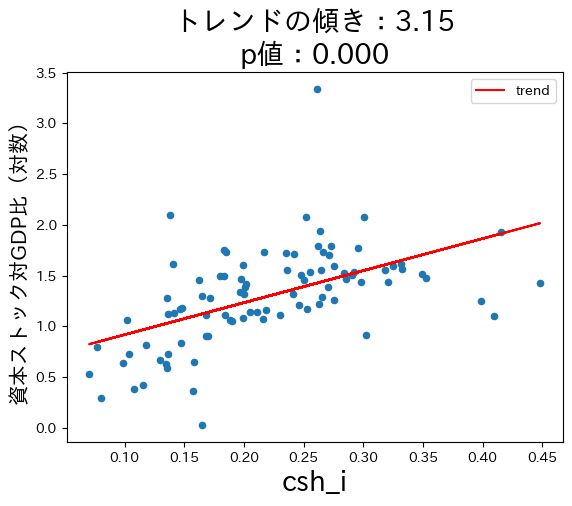

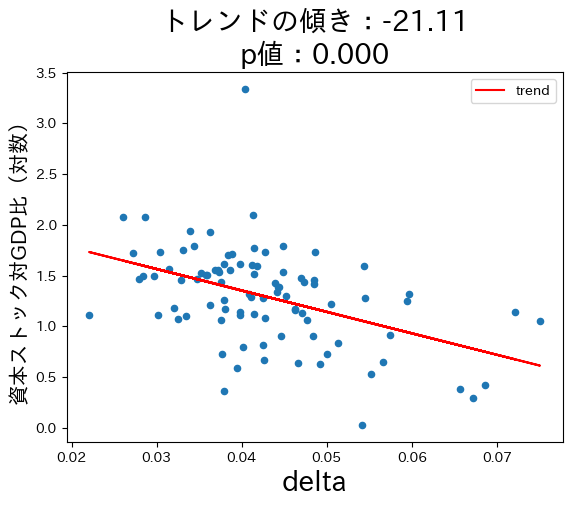

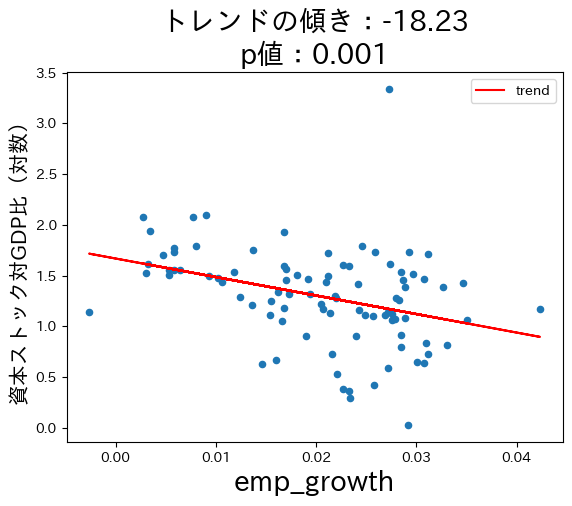

In [18]:
for var in ky_ratio.columns[-3:]:  # 最後の３変数
    
    df = ky_ratio.copy()           # コピーを作成
    res = smf.ols(f'ky_ratio ~ {var}', data=df).fit()  # 回帰分析
    bhat = res.params.iloc[1]      # スロープ係数の推定値
    pval = res.pvalues.iloc[1]     # スロープ係数のp値
    df['trend'] = res.fittedvalues  # 予測値を追加

    ax = df.plot.scatter(x=var, y='ky_ratio') # 散布図
    
    df.plot(x=var, y='trend', color='red', ax=ax) # 回帰直線
    
    ax.set_title(f'トレンドの傾き：{bhat:.2f}\n'  # タイトル
                 f'p値：{pval:.3f}', size=20)
    ax.set_ylabel('資本ストック対GDP比（対数）', size=15)  # 縦軸のラベル
    ax.set_xlabel(f'{var}', size=20)           # 横軸のラベル

３つの図からソロー・モデルの理論的予測はデータと整合性があることが確認できる。ここで注意する点が一つある。式[](eq:8-kyratio)は因果関係を予測している。例えば，貯蓄率が高くなることにより長期的な一人当たりGDPは増加する。一方，トレンド線は因果関係を示しているのではなく単なる相関関係を表している。